In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer#토큰
from tensorflow.keras.utils import to_categorical#원핫인코딩(정수형 범주)에만
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import numpy as np
import codecs
from konlpy.tag import Okt
with codecs.open('ratings_test.txt',encoding='utf-8') as f:
    data = [i.split('\t') for i in f.read().splitlines()]
    m = data[0]
    data=data[1:]# 쓸모없는 인덱스 걸름
#걸럿던 인덱스

In [2]:
p_data = pd.DataFrame(data,columns=m)#인덱스 명을 카테고리화
p_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


### 데이터 전처리 ->학습하기 위한 data로 정리하는 작업

1. 결측치확인

In [3]:
p_data.loc[p_data.document.isnull()]#데이터의 결측치는 없다 만약있다면 제거
#텍스트는 비정형데이터

,id,document,label


In [4]:
len(np.unique([1,21,43,23,1,2,3,43,123,12,3,4,]))#넘파이의 정보조회

9

In [5]:
len(p_data.document)

50000

In [6]:
p_data.document.nunique()#판다스의 중복된 데이터 제거를하면 나올 값(피쳐객수)

49158

In [7]:
p_data = p_data.drop_duplicates(subset=['document'])#서브셋 조건의 기준으로 중복 제거
#새 객체를 받아야한다.
len(p_data)

49158

In [8]:
p_data.document.isnull().sum()#빈칸은 없따!

0

In [9]:
p_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [10]:
p_data['document']=p_data.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')#대괄호에 포함안되는것을 공백
#데이터 삭제는 아니고 공백이됨

C:\Users\ho316\AppData\Local\Temp/ipykernel_19064/3670147643.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  p_data['document']=p_data.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')#대괄호에 포함안되는것을 공백
C:\Users\ho316\AppData\Local\Temp/ipykernel_19064/3670147643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_data['document']=p_data.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')#대괄호에 포함안되는것을 공백


In [11]:
p_data#수정된 데이터 =>이제 공백을 제거해야함(null화)=>dropna로 제거

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [12]:
p_data['document']=p_data.document.str.replace('^ +','')

C:\Users\ho316\AppData\Local\Temp/ipykernel_19064/1051484147.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  p_data['document']=p_data.document.str.replace('^ +','')
C:\Users\ho316\AppData\Local\Temp/ipykernel_19064/1051484147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_data['document']=p_data.document.str.replace('^ +','')


In [13]:
p_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [14]:
#자료형태를 바꿈, 데이터 프레임 전체에 접근해야하기 때문에 str.을 안씀
p_data['document']=p_data.document.replace('',np.nan)

C:\Users\ho316\AppData\Local\Temp/ipykernel_19064/4107654766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_data['document']=p_data.document.replace('',np.nan)


In [15]:
p_data#제거할 것들을 결측치로 치환

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,NaN,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [16]:
p_data = p_data.dropna(how='any')#axis=0 ,결측치를 전부 제거!

In [17]:
p_data

,id,document,label
0,6270596,굳 ㅋ,1
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
5,7898805,음악이 주가 된 최고의 음악영화,1
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [19]:
#불용어 설정
s_w=['은','는','이','가','를','들','에게','의','을','도','으로','만','라서','하다']

In [21]:
okt= Okt()

In [24]:
tk_d = okt.morphs(p_data.document[2])

In [25]:
[w for w in tk_d if not w in s_w]

['뭐', '야', '평점', '나쁘진', '않지만', '점', '짜', '리', '더', '더욱', '아니잖아']

In [26]:
from tqdm import tqdm
X_data = []
for i in tqdm(p_data['document']):#p_data.document 랑 같은의미
    tk_d = okt.morphs(i)
    end_d=[w for w in tk_d if not w in s_w]
    X_data.append(end_d)
X_data

100%|███████████████████████████████████████████████████████████████████████████| 48852/48852 [03:14<00:00, 251.52it/s]


[['굳', 'ㅋ'],
 ['뭐', '야', '평점', '나쁘진', '않지만', '점', '짜', '리', '더', '더욱', '아니잖아'],
 ['지루하지는', '않은데', '완전', '막장', '임', '돈', '주고', '보기', '에는'],
 ['아니었어도', '별', '다섯', '개', '줬을텐데', '왜', '로', '나와서', '제', '심기', '불편하게', '하죠'],
 ['음악', '주가', '된', '최고', '음악', '영화'],
 ['진정한', '쓰레기'],
 ['마치',
  '미국',
  '애니',
  '에서',
  '튀어나온듯',
  '한',
  '창의력',
  '없는',
  '로봇',
  '디자인',
  '부터가',
  '고개',
  '젖게',
  '한다'],
 ['갈수록',
  '개판',
  '되가는',
  '중국영화',
  '유치하고',
  '내용',
  '없음',
  '폼',
  '잡다',
  '끝남',
  '말',
  '안되는',
  '무기',
  '에',
  '유치한',
  '남무',
  '아',
  '그립다',
  '동사서독',
  '같은',
  '영화',
  '이건',
  '류',
  '아',
  '류작',
  '이다'],
 ['이별', '아픔', '뒤', '에', '찾아오는', '새로운', '인연', '기쁨', '모든', '사람', '그렇지는', '않네'],
 ['괜찮네요', '오랜', '포켓몬스터', '잼밌', '어', '요'],
 ['한국', '독립영화', '한계', '그렇게', '아버지', '된다와', '비교', '됨'],
 ['청춘',
  '아름답다',
  '그',
  '아름다',
  '움',
  '이성',
  '흔들어',
  '놓는다',
  '찰나',
  '아름다',
  '움',
  '잘',
  '포착',
  '한',
  '섬세하고',
  '아름다운',
  '수채화',
  '같은',
  '퀴어',
  '영화',
  '이다'],
 ['눈', '에', '보이는', '반전', '이었지만', '영화', '흡인', '

In [29]:
tk= Tokenizer(10)
tk.fit_on_texts(X_data)
len(tk.word_index)#실효성없는 데이터 까지포함됨

54256

In [32]:
ck_data1 = list(tk.word_counts.items())
ck_data1

[('굳', 124),
 ('ㅋ', 811),
 ('뭐', 1178),
 ('야', 508),
 ('평점', 2210),
 ('나쁘진', 12),
 ('않지만', 46),
 ('점', 2531),
 ('짜', 82),
 ('리', 106),
 ('더', 1509),
 ('더욱', 94),
 ('아니잖아', 29),
 ('지루하지는', 4),
 ('않은데', 24),
 ('완전', 813),
 ('막장', 228),
 ('임', 702),
 ('돈', 696),
 ('주고', 197),
 ('보기', 552),
 ('에는', 355),
 ('아니었어도', 6),
 ('별', 634),
 ('다섯', 36),
 ('개', 698),
 ('줬을텐데', 2),
 ('왜', 1706),
 ('로', 2648),
 ('나와서', 133),
 ('제', 491),
 ('심기', 1),
 ('불편하게', 10),
 ('하죠', 7),
 ('음악', 390),
 ('주가', 16),
 ('된', 545),
 ('최고', 1950),
 ('영화', 17231),
 ('진정한', 108),
 ('쓰레기', 1068),
 ('마치', 68),
 ('미국', 216),
 ('애니', 293),
 ('에서', 2330),
 ('튀어나온듯', 1),
 ('한', 3726),
 ('창의력', 2),
 ('없는', 1200),
 ('로봇', 36),
 ('디자인', 19),
 ('부터가', 27),
 ('고개', 13),
 ('젖게', 2),
 ('한다', 461),
 ('갈수록', 189),
 ('개판', 59),
 ('되가는', 1),
 ('중국영화', 28),
 ('유치하고', 74),
 ('내용', 1347),
 ('없음', 304),
 ('폼', 19),
 ('잡다', 2),
 ('끝남', 23),
 ('말', 1445),
 ('안되는', 192),
 ('무기', 25),
 ('에', 9254),
 ('유치한', 58),
 ('남무', 1),
 ('아', 1375),
 ('그립다'

In [34]:
ck_data2 = sorted(ck_data1,key=lambda x:x[1])

In [38]:
ck_data3 = [d for d in ck_data2 if d[1]>4]#빈도수 3초과만
len(ck_data3)

10419

In [47]:
tk = Tokenizer(10420)
tk.fit_on_texts(X_data)
len(tk.word_index)

54256

In [48]:
#단어들의 모음, 
ck_x = tk.texts_to_sequences(X_data)
np.unique(ck_x)

array([list([]), list([1]),
       list([1, 1, 18, 189, 9, 344, 1003, 5095, 607, 127, 1589, 19, 202, 516, 1469, 171, 143, 4537, 516]),
       ..., list([10416, 293, 5003, 11]), list([10416, 4639, 5755]),
       list([10418, 10418, 10418, 10418, 10418, 831])], dtype=object)

In [49]:
len(np.unique([k for i in ck_x for k in i]))

10419

In [53]:
len(p_data.document),len(p_data.label)

(48852, 48852)

In [50]:
len(X_data)

48852

In [51]:
len(ck_x)

48852

In [65]:
#비어있는 데이터를 제외하는 조건
d_x = [i for i,n in enumerate(ck_x) if len(n)<1]

In [67]:

for i in enumerate(ck_x):
    print(i)
    if i[0]==5:
        break

(0, [635, 80])
(1, [57, 150, 12, 4670, 1555, 10, 946, 742, 37, 835, 2342])
(2, [2742, 78, 352, 97, 100, 407, 133, 212])
(3, [7859, 118, 1941, 98, 28, 9, 589, 155, 5407, 7024])
(4, [195, 3736, 135, 17, 195, 1])
(5, [721, 62])


In [69]:
ck_x[1]

[57, 150, 12, 4670, 1555, 10, 946, 742, 37, 835, 2342]

In [70]:
X_data[1]#ck_x[1]의 토큰

['뭐', '야', '평점', '나쁘진', '않지만', '점', '짜', '리', '더', '더욱', '아니잖아']

In [72]:
Y_data=p_data.label
Y_data

0        1
2        0
3        0
4        0
5        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: label, Length: 48852, dtype: object

In [73]:
d_x

[17,
 172,
 220,
 297,
 395,
 542,
 589,
 997,
 1569,
 1590,
 1597,
 2236,
 2280,
 2305,
 2373,
 2584,
 2860,
 3046,
 3101,
 3213,
 3297,
 3396,
 3482,
 3545,
 3576,
 3730,
 3788,
 3814,
 4192,
 4951,
 5162,
 5207,
 5241,
 5672,
 5814,
 5884,
 6150,
 6532,
 6667,
 6850,
 6856,
 6992,
 7060,
 7070,
 7181,
 7298,
 7724,
 7760,
 7938,
 7981,
 8211,
 8268,
 8323,
 8393,
 8553,
 8784,
 8808,
 8932,
 8966,
 8988,
 9314,
 9367,
 9437,
 9791,
 9901,
 10381,
 10502,
 10928,
 10981,
 11039,
 11263,
 11361,
 11417,
 11487,
 11969,
 11981,
 12609,
 12846,
 12907,
 12927,
 12981,
 13023,
 13034,
 13143,
 13449,
 13880,
 13918,
 13935,
 13945,
 14097,
 14153,
 14253,
 14477,
 14708,
 14868,
 15056,
 15340,
 15375,
 15706,
 15729,
 15738,
 15850,
 16504,
 16569,
 16658,
 16877,
 17085,
 17306,
 17332,
 17465,
 17560,
 17586,
 17601,
 17703,
 17805,
 17853,
 17924,
 18059,
 18302,
 18734,
 18918,
 19035,
 19241,
 19258,
 19301,
 19302,
 19484,
 19513,
 19553,
 19556,
 19715,
 19765,
 19936,
 20267,
 2

In [76]:
len(X_data),len(Y_data)#X데이터가 지워지면 대응되는 y데이터도 지워기게끔

(48852, 48852)

In [77]:
#다시 정리해서
tk = Tokenizer(num_words=10420)
tk.fit_on_texts(X_data)
X_data=tk.texts_to_sequences(X_data)
Y_data=np.array(p_data.label)

In [78]:
len(X_data),len(Y_data)#동일한 크기.. 공백데이터가 아직 제외안됨

(48852, 48852)

In [79]:
#드롭할 인덱스
d_idx = [i for i,n in enumerate(ck_x) if len(n)<1]

In [80]:
X_data = np.delete(X_data,d_idx,axis=0)#제일 낮은축을 기준으로 삭제
Y_data = np.delete(Y_data,d_idx,axis=0)#제일 낮은축을 기준으로 삭제

C:\Users\ho316\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [82]:
len(X_data),len(Y_data)#공백제거됨!

(48530, 48530)

In [83]:
np.unique(X_data)#데이터 가 정리됨 ㅇㅇ

array([list([1]),
       list([1, 1, 18, 189, 9, 344, 1003, 5095, 607, 127, 1589, 19, 202, 516, 1469, 171, 143, 4537, 516]),
       list([1, 1, 200, 16, 334, 63, 34, 2363, 28, 25, 62, 1, 9, 6835, 466]),
       ..., list([10416, 293, 5003, 11]), list([10416, 4639, 5755]),
       list([10418, 10418, 10418, 10418, 10418, 831])], dtype=object)

In [89]:
#데이터의 크기를 맞춰줘야한다.=패딩

(59, 1)

In [87]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
ck1_data = pad_sequences(X_data)#패르디딩딩딩
len(ck1_data[0])#한줄당 데이터 수

59

In [94]:
ck_df=pd.DataFrame(ck1_data)
ck_df['Y'] = Y_data
ck_df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,Y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,635,80,1
1,0,0,0,0,0,0,0,0,0,0,...,12,4670,1555,10,946,742,37,835,2342,0
2,0,0,0,0,0,0,0,0,0,0,...,0,2742,78,352,97,100,407,133,212,0
3,0,0,0,0,0,0,0,0,0,0,...,118,1941,98,28,9,589,155,5407,7024,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,195,3736,135,17,195,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48525,0,0,0,0,0,0,0,0,0,0,...,12,9,922,2037,43,6457,4,1,10255,1
48526,0,0,0,0,0,0,0,0,0,0,...,0,3260,136,6307,903,82,7107,3695,1014,0
48527,0,0,0,0,0,0,0,0,0,0,...,0,0,730,266,829,5103,90,259,1389,0
48528,0,0,0,0,0,0,0,0,0,0,...,240,2071,704,4,4402,636,11,5,60,0


In [98]:
#의미없는 데이터가 많음,제일 긴 데이터로 패딩했기때문에
ck1_y=to_categorical(Y_data)

In [99]:
t_x,tt_x,t_y,tt_y = train_test_split(ck1_data,ck1_y,random_state=1)
t_x.shape,tt_x.shape,t_y.shape,tt_y.shape

((36397, 59), (12133, 59), (36397, 2), (12133, 2))

In [110]:
ck_m=Sequential()
ck_m.add(Dense(2,input_shape=(59,),activation='sigmoid'))
ck_m.compile(optimizer='adam',loss='binary_crossentropy'
          ,metrics=['accuracy'])
hy=ck_m.fit(t_x,t_y,epochs=10,validation_data=(tt_x,tt_y))

Epoch 1/10
1138/1138 [==============================] - 1s 809us/step - loss: 93.2880 - accuracy: 0.5039 - val_loss: 9.1911 - val_accuracy: 0.4972
Epoch 2/10
1138/1138 [==============================] - 1s 716us/step - loss: 4.7900 - accuracy: 0.5025 - val_loss: 3.5647 - val_accuracy: 0.5041
Epoch 3/10
1138/1138 [==============================] - 1s 706us/step - loss: 2.9216 - accuracy: 0.4986 - val_loss: 3.0490 - val_accuracy: 0.5013
Epoch 4/10
1138/1138 [==============================] - 1s 702us/step - loss: 2.6231 - accuracy: 0.5070 - val_loss: 3.0014 - val_accuracy: 0.4972
Epoch 5/10
1138/1138 [==============================] - 1s 718us/step - loss: 2.6675 - accuracy: 0.4990 - val_loss: 2.7065 - val_accuracy: 0.4972
Epoch 6/10
1138/1138 [==============================] - 1s 720us/step - loss: 2.6401 - accuracy: 0.5008 - val_loss: 3.2926 - val_accuracy: 0.5007
Epoch 7/10
1138/1138 [==============================] - 1s 727us/step - loss: 2.5929 - accuracy: 0.5066 - val_loss: 2.7936 

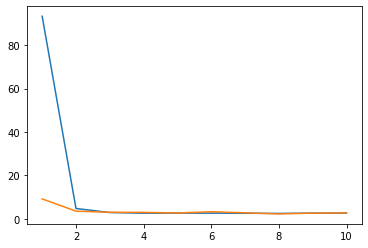

In [111]:
ec=range(1,len(hy.history['accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])

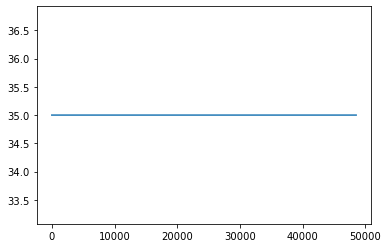

In [117]:
ck_n = [len(i)for i in X_data]
plt.plot(ck_n)#대충 35쯤에 몰림

In [115]:
X_data = pad_sequences(X_data,maxlen=35)
X_data.shape
#임베딩을 해보자~~~~~

(48530, 35)

In [134]:
Y_data=Y_data.astype(int)#객체 타입 바꾸기

In [ ]:
Y_data

In [142]:
t_x,tt_x,t_y,tt_y = train_test_split(X_data,Y_data,random_state=1)

In [148]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import load_model
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=4)
m_ck=ModelCheckpoint('best_m.h5',monitor='val_accuracy',
                     mode='max',verbose=1,save_best_only=True)#최적의 값일때 모델 저장


In [149]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
end_m=Sequential()
end_m.add(Embedding(10420,100))
end_m.add(LSTM(128))#쉘 구조인 데스웅
end_m.add(Dense(1,activation='sigmoid')) #최종장인데치
#구축
end_m.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [150]:
hy=end_m.fit(t_x,t_y,epochs=12,callbacks=[es,m_ck]
             ,batch_size=64,validation_data=(tt_x,tt_y))

Epoch 1/12
569/569 [==============================] - 26s 38ms/step - loss: 0.4572 - accuracy: 0.7792 - val_loss: 0.3891 - val_accuracy: 0.8252

Epoch 00001: val_accuracy improved from -inf to 0.82519, saving model to best_m.h5
Epoch 2/12
569/569 [==============================] - 21s 37ms/step - loss: 0.3511 - accuracy: 0.8493 - val_loss: 0.3772 - val_accuracy: 0.8303

Epoch 00002: val_accuracy improved from 0.82519 to 0.83030, saving model to best_m.h5
Epoch 3/12
569/569 [==============================] - 20s 36ms/step - loss: 0.3224 - accuracy: 0.8625 - val_loss: 0.3737 - val_accuracy: 0.8341

Epoch 00003: val_accuracy improved from 0.83030 to 0.83409, saving model to best_m.h5
Epoch 4/12
569/569 [==============================] - 20s 36ms/step - loss: 0.2994 - accuracy: 0.8722 - val_loss: 0.3855 - val_accuracy: 0.8317

Epoch 00004: val_accuracy did not improve from 0.83409
Epoch 5/12
569/569 [==============================] - 20s 36ms/step - loss: 0.2783 - accuracy: 0.8820 - val_lo

In [151]:
ck_m_end = load_model('best_m.h5')
ck_m_end.evaluate(tt_x,tt_y)

380/380 [==============================] - 3s 7ms/step - loss: 0.3737 - accuracy: 0.8341


[0.3736950755119324, 0.8340888619422913]

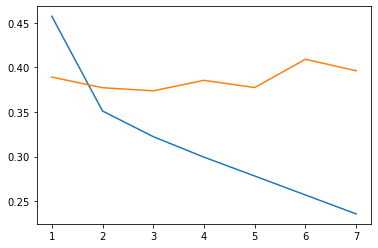

In [152]:
ec=range(1,len(hy.history['accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])

In [ ]:
# 이렇게 처리해도 발산을 해버리는데 임베딩을 거쳐야 정상적으로 돌아갈 것이다.